In [1]:
## importamos librerias
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [2]:
#puntos = puntos a  graficar
#f = funcion a graficar 
def grafico(puntos_x,puntos_y,f,tituloGrafico:str,a,b,r):
    PUNTO_X_MAX =  max(puntos_x)
    PUNTO_X_MIN = min(puntos_x)
    DOMINIO = 5
    #genero X_Y para el dominio de x 
    #x_values = np.arange(PUNTO_X_MIN-DOMINIO,DOMINIO+PUNTO_X_MAX,step=1)
    x_values = puntos_x
    #genero X_Y para la imagen de y
    y_values = ([f(x) for x in x_values])
    # Agregar el eje de abscisas
    plt.axhline(y=0, color='black', linestyle='--')
    # Agregar el eje de ordenadas
    plt.axvline(x=0, color='black', linestyle='--')
    #agrego puntos calulados 
    plt.scatter(puntos_x,puntos_y,c="red")
    #ploteo el grafico
    plt.plot(x_values,y_values)
    #agrego labels
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(tituloGrafico)
    PUNTOS_Y_MIN = min(puntos_y)
    PUNTOS_Y_MAX = max(puntos_y)
    plt.ylim(PUNTOS_Y_MIN-DOMINIO,PUNTOS_Y_MAX+DOMINIO)
    #muestro el grafico

    cuadro_texto = f'a = {a:.2f}, b = {b:.2f}, r = {r:.2f}'
    plt.text(0.18, 0.95, cuadro_texto, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))


    
    plt.show()

### Ingesta de valores de x e y

Mostramos por pantalla el dataset que vamos a utilizar 

In [3]:
data = pd.read_excel("ejemplo.xlsx")
data.head()

,x,y
0,32.270211,5.674533
1,32.967373,5.686818
2,34.858147,5.938613
3,35.147285,5.907624
4,35.629564,5.909206


In [4]:
#Lo pasamos a un array de numpy para ganar preformance
X_Y = pd.read_excel("ejemplo.xlsx").to_numpy()
x_values = X_Y[:,0]
y_values = X_Y[:,1]



### X_Y necesarios para los calculos
![explicacion de datos](fotoExplicativa.png)

In [5]:
#x_values =  np.array, valores de x
#y_values =  np.array, valores de y
def datosFormula(x_values:np.ndarray,y_values:np.ndarray):
    XY = (x_values*y_values).reshape(-1,1)
    X_POW_2 = np.power(x_values,2).reshape(-1,1)
    Y_POW_2 = np.power(y_values,2).reshape(-1,1)
    DATES = np.concatenate((x_values.reshape(-1,1),y_values.reshape(-1,1),XY,X_POW_2,Y_POW_2),axis=1)
    
    ## realizamos la suma de todos los elementos de las filas para cada columna y sacamos su promedio
    return np.sum(DATES,axis=0)/X_Y.shape[0]

### coeficiente de correlación
![](fotoCorrelacion.png)

In [6]:
#x_values =  np.array, valores de x
#y_values =  np.array, valores de y
def corelacionParson(x_values:np.ndarray,y_values:np.ndarray):
    x_prom, y_prom, xy_prom, xpow_prom, ypow_prom= datosFormula(x_values,y_values)
    try: 
        r = (xy_prom-(x_prom*y_prom)) / ((np.sqrt((xpow_prom-(x_prom**2)))) * (np.sqrt((ypow_prom-(y_prom**2))))) 
    except:
        Exception("Divison por 0")
        
    return r

### Calculo por cuadrados minimos de a y b
![](fotoExplicativa1.png)

In [7]:
#x_values =  np.array, valores de x
#y_values =  np.array, valores de y
def calcA_BCuadradaosMinimos(x_values:np.ndarray,y_values:np.ndarray):
    """
        Esta funcion calcula la pendiente y el termino independiente por medio de cuadrados minimos
        para ecuaciones lineales o exponenciales linealizadas  
    """
    x_prom, y_prom, xy_prom, xpow_prom, _= datosFormula(x_values,y_values)
    
    #denominador identico para M y B
    DEN = ((xpow_prom) - (x_prom)**2)
    #vaidamos que no sea 0
    if (DEN == 0):
        Exception("Error: divison por 0")       
                            
    #calculamos la pendiente 
    A = ((xy_prom) - (x_prom*y_prom)) / DEN
    #calculamos el temrino independiente
    B = ((xpow_prom*y_prom) - (x_prom*xy_prom)) / DEN
    
    return A,B
    


## Pruebas para curva 1: y = ax +b

In [8]:
 
a,b = calcA_BCuadradaosMinimos(x_values,y_values)
ecuation1 = lambda x: a*x + b


In [9]:
print(a,b)

0.026563702960863016 5.179170070271093


In [10]:
r = corelacionParson(x_values,np.array([ecuation1(x_value) for x_value in x_values]))

In [11]:
print (r)

0.9999999999999797


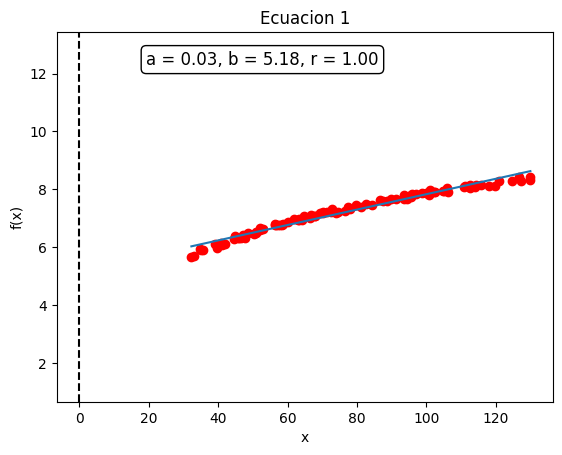

In [12]:
grafico(X_Y[:,0],X_Y[:,1],lambda x : a*x+b,"Ecuacion 1",a,b,r)

### Pruebita de curva 2: y = b*x^a ---> lineriazada: ln(y) = ln(b) + a ln(x) --> (x,y) = (ln(x),ln(y))

In [13]:
x = np.log(x_values)
y = np.log(y_values)
A,B = calcA_BCuadradaosMinimos(x,y)
##Como devuelve el ln(b) para poder utilizar la funcion no linearizada necesitamos b b es igaul a la inversa del ln
B = np.e**B
ecuation2 = lambda x : B * np.power(x, A)

In [14]:
print (A,B)

0.27429997781547 2.2239116190625308


In [15]:
r = corelacionParson(x,y)

In [16]:
print(r)

0.9968817375993468


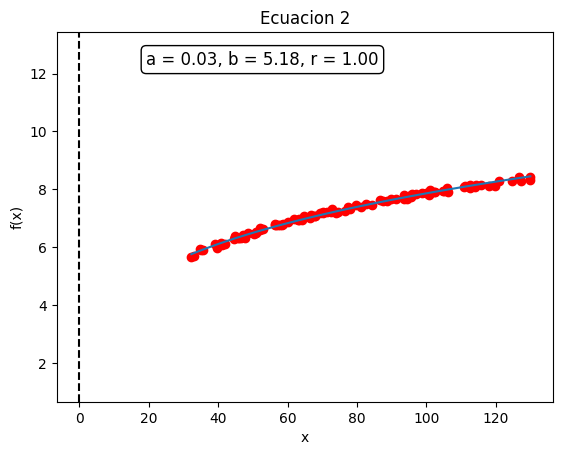

In [17]:
grafico(X_Y[:,0],X_Y[:,1],ecuation2,"Ecuacion 2",a,b,r)

Calculo el tiempo de duplicacion de la segunda ecuacion y = bx^a

### Pruebita de curva 3: y = b*e^(a*x) ---> lineriazada: ln(y) = ln(b) + a*x --> (x,y) = (x,ln(y))

In [18]:
y = np.log(y_values)
A,B = calcA_BCuadradaosMinimos(x_values,y)
##Como devuelve el ln(b) para poder utilizar la funcion no linearizada necesitamos b b es igaul a la inversa del ln
B = np.e**B
ecuation3 = lambda x : B * np.power(np.e, (A*x))

In [19]:
print (A,B)

0.0037263627634629695 5.3939577826753435


In [20]:
r = corelacionParson(x_values,y)

In [21]:
print(r)

0.9752014986029207


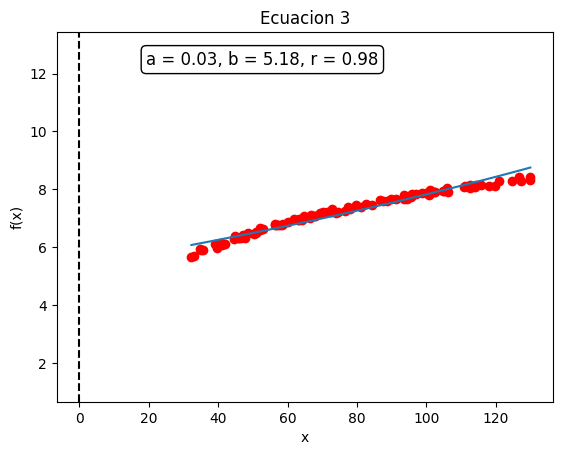

In [22]:
grafico(X_Y[:,0],X_Y[:,1],ecuation3,"Ecuacion 3",a,b,r)


La función calcular_tiempo_duplicacion toma cuatro parámetros: x, y, a y b. Los parámetros x e y representan las variables independiente y dependiente respectivamente del dataset. Los parámetros a y b son los coeficientes de la línea de regresión lineal obtenidos previamente mediante el ajuste de cuadrados mínimos.

In [23]:
def calcular_tiempo_duplicacion(x, y, a, b):
    
    # Multiplicamos el primer valor de y por 2 (2 * y[0]) y lo almacenamos en la variable valor_doble_y. 
    # Esto nos da el valor de y cuando es el doble del valor inicial. Esta es una forma de definir el punto en el que queremos encontrar el tiempo de duplicación.
    valor_doble_y = 2 * y[0]
    
    # Se utiliza la ecuación de la recta (y = ax + b) y se despeja x para calcular el valor correspondiente al punto de corte donde y es igual al valor doble (valor_doble_y). El cálculo se realiza mediante la fórmula (valor_doble_y - b) / a, y el resultado se almacena en la variable punto_corte_x.
    punto_corte_x = (valor_doble_y - b) / a

    # Se calcula la diferencia en x entre el punto de corte (punto_corte_x) y el valor inicial de x (x[0]). Esta diferencia nos proporciona el tiempo de duplicación.
    tiempo_duplicacion = punto_corte_x - x[0]

    return tiempo_duplicacion

In [24]:
calcular_tiempo_duplicacion(x_values,y_values,a,b)

199.99773548586592